# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.294440e+01     1.545608e+01
 * time: 0.004061222076416016
     1     6.324544e+01     9.642772e+00
 * time: 0.011820077896118164
     2     5.906062e+01     1.136408e+01
 * time: 0.0322260856628418
     3     4.092771e+01     8.792234e+00
 * time: 0.057862043380737305
     4     2.925566e+01     7.384532e+00
 * time: 0.08431816101074219
     5     1.818592e+01     3.458968e+00
 * time: 0.10609316825866699
     6     1.233083e+01     2.271805e+00
 * time: 0.1244051456451416
     7     1.059452e+01     2.603780e+00
 * time: 0.14266610145568848
     8     9.837621e+00     4.840402e+00
 * time: 0.16099810600280762
     9     8.701809e+00     2.788058e+00
 * time: 0.26460814476013184
    10     8.099510e+00     1.441931e+00
 * time: 0.28321409225463867
    11     7.711955e+00     2.085835e+00
 * time: 0.297760009765625
    12     7.422285e+00     1.672384e+00
 * time: 0.312636137008667
    13     7.240880e+00     1.339388e+00
 * time: 0.

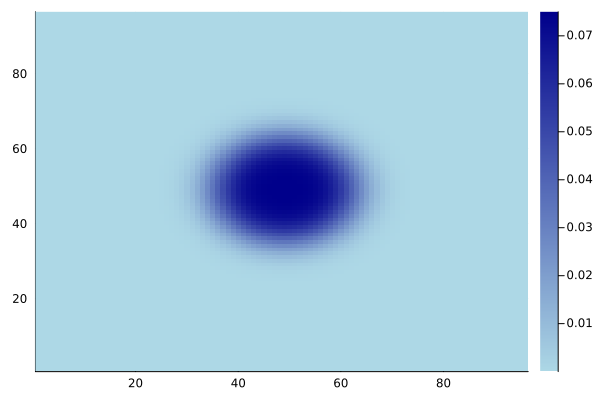

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)